In [1]:
import numpy as np
import pandas as pd
import modello_QT as md
import modello_QT_stoch as md1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
import math as m


import numpy as np
import pandas as pd
import modello_QT as md
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
import math as m



###############################
FILLER = -1
def price_normalise(price, min_p, max_p):
    middle_point = (max_p + min_p) / 2
    half_length = (max_p - min_p) / 2
    price = (price - middle_point) / half_length
    return price

def column_min_max_normalize(matrix, min, max):#, data
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    #scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(matrix)
    min_vals = min#np.min(matrix, axis=0)#np.min(data)#
    max_vals = max#np.max(matrix, axis=0)#np.max(data)#
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    if normalized_matrix.shape != ():
        for i in range(normalized_matrix.shape[0]):
            for ii in range(normalized_matrix.shape[1]):
                if normalized_matrix[i,ii] > 1: normalized_matrix[i,ii] = 1
                elif normalized_matrix[i,ii] <-1: normalized_matrix[i,ii] = -1

    return normalized_matrix 

def heatAct(data, min, max):
    n = 21
    #data = mu0qtp
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(0,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(FILLER)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 7))

    # Loop through each subplot and generate a heatmap for it
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap="YlGnBu")
                ax.set_title('$-1 \leq \\bar{p} \leq -0.5$')#
            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap="YlGnBu")
                ax.set_title('$-0.5 \leq \\bar{p} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap="YlGnBu")
                ax.set_title('$0 \leq \\bar{p} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap="YlGnBu")
                ax.set_title('$0.5 \leq \\bar{p} \leq 1$')#

    # Add a main title to the figure
    fig.suptitle('Avg action conditioned to Q,T and normalised prices $\\bar{p}$')
    
    # Show the figure
    plt.show()

def heat(states, actions = False):
    for i in range(states.shape[0]):
        states[i,0] = states[i,0] + states[i,2]
    df = pd.DataFrame(np.nan, index=np.arange(0,21), columns=['1', '2', '3', '4', '5','6'])
    df = df.fillna(FILLER)
    z = df.to_numpy()
    ds = pd.DataFrame(states ,columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q','T']).mean().reset_index()
    a = h.to_numpy()
    #z = np.zeros((21,6))
    for i in range(1,21): #mx 20
        for ii in range(1,6): #mx 5
            for iii in range(len(a[:])):
                if i == a[:,0][iii] and ii == a[:,1][iii]:
                    z[int(i),int(ii)] = a[iii,2]
    sns.heatmap(z[:,1:], cmap="YlGnBu")
    plt.title('average action conditioned to inventory and time')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.show()

def heat_test(stati):
    a=stati
    df = pd.DataFrame(np.nan, index=np.arange(0,21), columns=['1', '2', '3', '4', '5'])
    df = df.fillna(FILLER)
    z = df.to_numpy()
    for i in range(21): #mx 20
        for ii in range(1,5): #mx 5
            for iii in range(len(a[:])):
                if i == a[:,0][iii] and ii == a[:,1][iii]:
                    z[int(i),int(ii)] += 1 #a[iii,2]
    sns.heatmap(z, cmap="YlGnBu" )
    plt.title('states explored in test')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.show()

def heat_v(states, actions = False):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0,21), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
    df = df.fillna(FILLER)
    z = df.to_numpy()#np.zeros((21,5))
    ds = pd.DataFrame(arr,columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q','T']).mean().reset_index()
    a = h.to_numpy()
    for i in range(31): #mx 20
        for ii in range(0,10): #mx 5
            for iii in range(len(a[:])):
                if i == a[:,0][iii] and ii == a[:,1][iii]:
                    z[int(i),int(ii)] = a[iii,2]
    plt.figure(figsize=(6, 7))
    sns.heatmap(z, cmap="YlGnBu")
    
    plt.title('average action conditioned to inventory and time')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.tight_layout()
    plt.show()

def heat_v_neg(states):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0,42), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
    df = df.fillna(FILLER)#######################################################################################################################################################################
    z = df.to_numpy()#np.zeros((21,5))
    ds = pd.DataFrame(arr,columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q','T']).mean().reset_index()
    a = h.to_numpy()
    for i in range(42): #mx 20
        for ii in range(0,10): #mx 5
            for iii in range(len(a[:])):
                if i == a[:,0][iii] and ii == a[:,1][iii]:
                    z[int(i),int(ii)] = a[iii,2]
    sns.heatmap(z, cmap="YlGnBu")
    plt.title('average action conditioned to q and t')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.tight_layout()
    plt.figure(figsize=(6, 7))
    #plt.tight_layout()
    plt.show()

def heatAct_neg(data, min, max):
    n = 42#len(data)
    #data = mu0qtp
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(0,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(FILLER)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 7))

    # Loop through each subplot and generate a heatmap for it
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap="YlGnBu")
                ax.set_title('$-1 \leq \\bar{p} \leq -0.5$')#
            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap="YlGnBu")
                ax.set_title('$-0.5 \leq \\bar{p} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap="YlGnBu")
                ax.set_title('$0 \leq \\bar{p} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap="YlGnBu")
                ax.set_title('$0.5 \leq \\bar{p} \leq 1$')#

    # Add a main title to the figure
    fig.suptitle('Avg action conditioned to Q,T and normalised prices $\\bar{p}$')
    plt.tight_layout()
    # Show the figure
    plt.show()


    #########################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def heat_v(states, actions):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    df = df.fillna(-1)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]

    azionimu0qtp = actions
    q = np.zeros(11)
    q[0] = 20
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    sns.heatmap(z, cmap="YlGnBu")

    # Highlight cells corresponding to values in q with red borders
    #for i in range(0, len(q)):
    #    plt.gca().add_patch(plt.Rectangle((i, int(q[i])), 1, 1, fill=None, edgecolor='red', linewidth=1))

    #plt.plot(q, '--', color='red')
    plt.title('Average Action Conditioned to Inventory and Time')
    plt.xlabel('Time')
    plt.ylabel('Inventory')
    plt.show()
    print(q)

# Example usage
# Define 'states' and 'actions' arrays before calling the function
# heat_v(states, actions)




def remove_outliers(data):
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(data, 10)
    Q3 = np.percentile(data, 90)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data




In [2]:
def heatAct(data, min, max, actions):
    azionimu0qtp = actions
    q = np.zeros(11)
    q[0] = 20
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    n = 21
    #data = mu0qtp
    FILLER = -1
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(0,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(np.nan)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 7))

    # Loop through each subplot and generate a heatmap for it
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    #ns.heatmap(z, cmap=cmap)
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:

                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap=cmap)
                ax.set_title('$-1 \leq \\bar{S} \leq -0.5$')#                

            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap=cmap)
                ax.set_title('$-0.5 \leq \\bar{S} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0 \leq \\bar{S} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0.5 \leq \\bar{S} \leq 1$')#
            #for h in range(len(q)):
            #    rect = plt.Rectangle((h, int(q[h])), 1, 1, fill=None, edgecolor='red', linewidth=1)
            #    ax.add_patch(rect)   
    # Add a main title to the figure
    fig.suptitle('Average $v$ conditioned to Q,T,$\\bar{S}$')

    # Show the figure
    plt.show()



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def heat_v(states, actions):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    df = df.fillna(np.nan)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]

    azionimu0qtp = actions
    q = np.zeros(11)
    q[0] = 20
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    sns.heatmap(z, cmap=cmap)
    # Highlight cells corresponding to values in q with red borders
    #for i in range(0, len(q)):
    #    plt.gca().add_patch(plt.Rectangle((i, int(q[i])), 1, 1, fill=None, edgecolor='red', linewidth=1))

    #plt.plot(q, '--', color='red')
    plt.title('Average $v$ Conditioned to Q, T')
    plt.xlabel('Time')
    plt.ylabel('Inventory')
    plt.show()
    print(q)

# Example usage
# Define 'states' and 'actions' arrays before calling the function
# heat_v(states, actions)


Temporary impact = 0.002 Permanent impact = 0.001
===
TWAP è la miglior strategia qui

Features Q,T

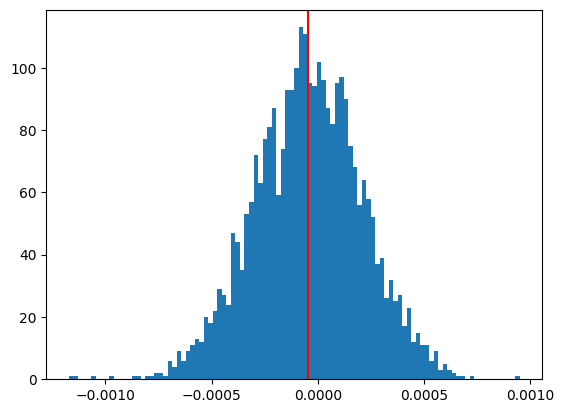

median= -4.43994597476778e-05 std= 0.00025442405931467405 Dmean= -4.554681182029518e-05
forma chiusa= 0.26
twap= 0.2607706302786112
ql= 0.2698735263314567


In [3]:
'''A&C Features Q,T'''

N = 10
c = 0
v = 0
alf = 0.002
tau = 1/N
alfa  = 0.002 * tau
kappa = 0.001
q_0 = 20
selling = np.array([q_0/N]*N)

sigma = 0.01
s =  0
mu = 0 
en = 0
for n in selling:
    s += (n)**2
    en += n * 1/tau
c =  0.5 * kappa * q_0**2 + (alfa - 0.5 * kappa * tau) / tau * s #100
c


azioni_tw = np.ones((5_000,10)) * 2

dati =   np.load('C:/Users/macri/Desktop/ennesima_old/dati_TWAP_10_0.001.npy')
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_tw.reshape(-1,10)[i].T - 0.002 * azioni_tw.reshape(-1,10)[i].T**2))
    
azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qt_10k/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qt_10k/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - 0.002 * azioni.reshape(-1,10)[i].T**2))

a = np.asarray(a)[:3000]
at = np.asarray(at)
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


In [4]:
from scipy import stats

# Two sample datasets
data1 = a
data2 = at

# Perform two-sample KS test
ks_statistic, p_value = stats.ks_2samp(data1, data2)

# Print the test statistic and p-value
print("KS Statistic:", ks_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The two samples are drawn from the same distribution (fail to reject H0)")
else:
    print("The two samples are drawn from different distributions (reject H0)")

KS Statistic: 0.11533333333333333
P-Value: 8.602884441075004e-18
The two samples are drawn from different distributions (reject H0)


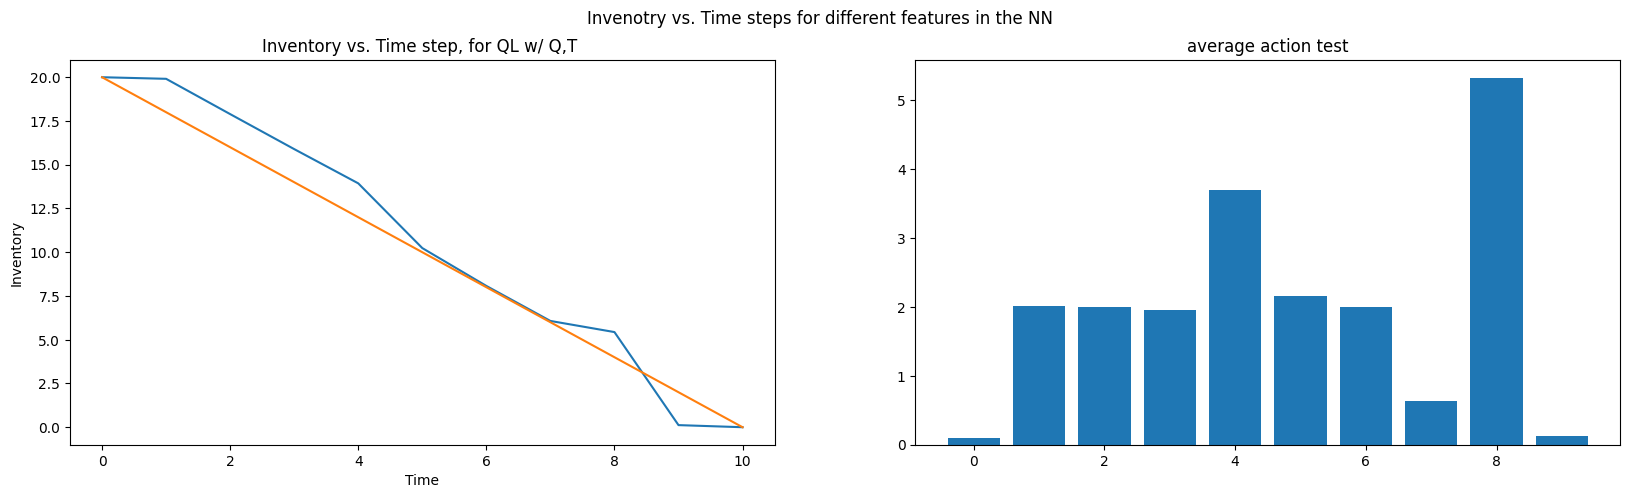

In [5]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qt_10k/perAz/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni_tw.reshape(-1,10).mean(0)
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

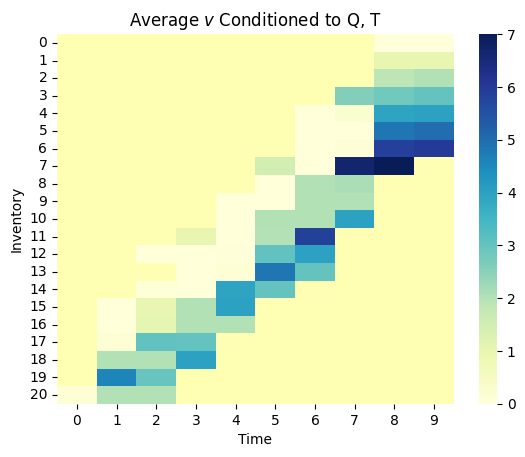

[20. 18. 16. 14. 12. 10.  8.  6.  4.  2.  0.]


In [6]:
mu0  =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qt_10k/perAz/stati.npy')
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qt_10k/perAz/dati.npy')

mu0[:,1] = mu0[:,1] - 1
azioni_tw = np.ones(10) * 2 
heat_v(mu0,azioni_tw.reshape(-1,10).mean(0))

Features Q,T,P

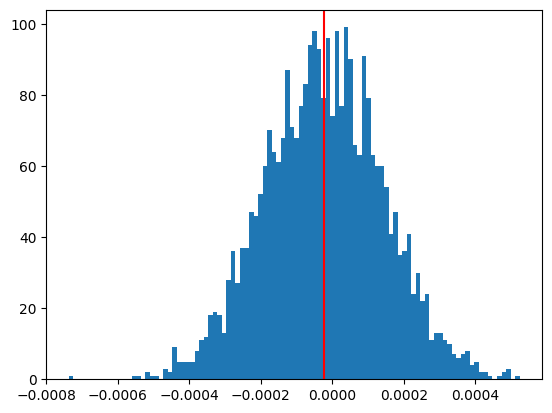

median= -2.149761208358342e-05 std= 0.0001660834615488437 Dmean= -2.255663567211226e-05
forma chiusa= 0.26
twap= 0.2607706302786112
ql= 0.265281530681582


In [7]:
'''A&C Features Q,T,P'''

N = 10
c = 0
v = 0
alf = 0.002
tau = 1/N
alfa  = 0.002 * tau
kappa = 0.001
q_0 = 20
selling = np.array([q_0/N]*N)

sigma = 0.01
s =  0
mu = 0 
en = 0
for n in selling:
    s += (n)**2
    en += n * 1/tau
c =  0.5 * kappa * q_0**2 + (alfa - 0.5 * kappa * tau) / tau * s #100
c


azioni_tw = np.ones((5_000,10)) * 2

dati =   np.load('C:/Users/macri/Desktop/ennesima_old/dati_TWAP_10_0.001.npy')

at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_tw.reshape(-1,10)[i].T - 0.002 * azioni_tw.reshape(-1,10)[i].T**2))
    
azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qtp_10k/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qtp_10k/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - 0.002 * azioni.reshape(-1,10)[i].T**2))

a = np.asarray(a)[:3000]
at = np.asarray(at)#
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


In [8]:
from scipy import stats

# Two sample datasets
data1 = a
data2 = at

# Perform two-sample KS test
ks_statistic, p_value = stats.ks_2samp(data1, data2,alternative='two-sided')

# Print the test statistic and p-value
print("KS Statistic:", ks_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The two samples are drawn from the same distribution (fail to reject H0)")
else:
    print("The two samples are drawn from different distributions (reject H0)")

KS Statistic: 0.464
P-Value: 6.3136376305927275e-292
The two samples are drawn from different distributions (reject H0)


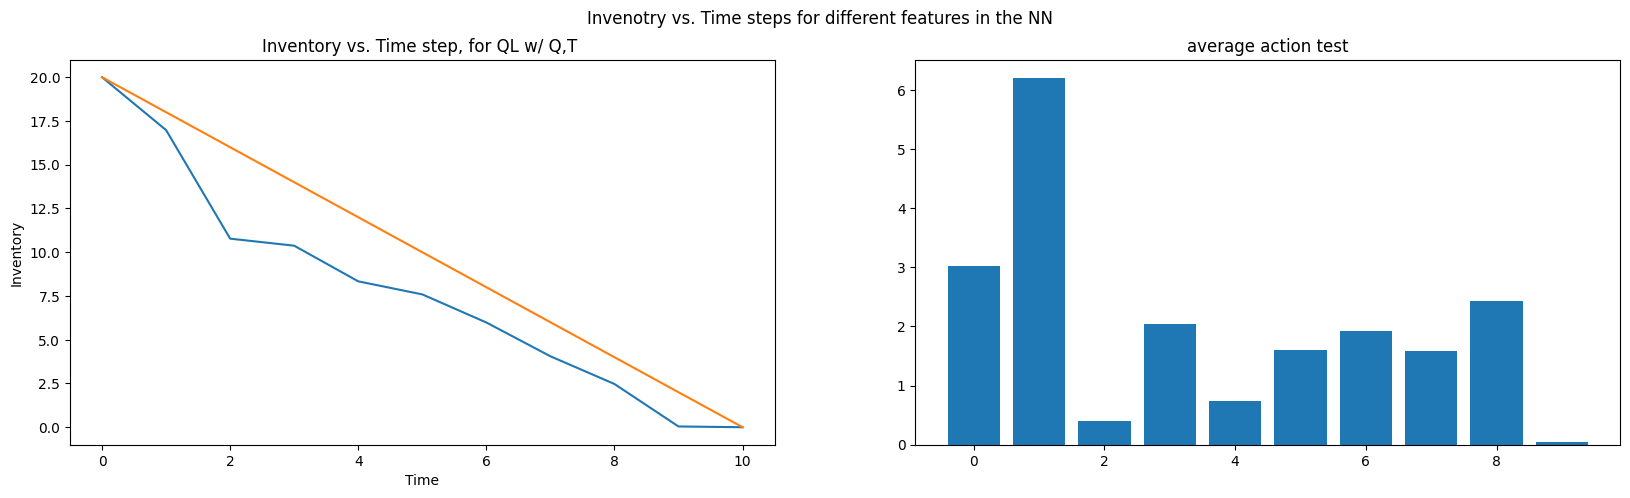

In [9]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qtp_10k/perAz/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni_tw.reshape(-1,10).mean(0)
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0]. plot(q)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

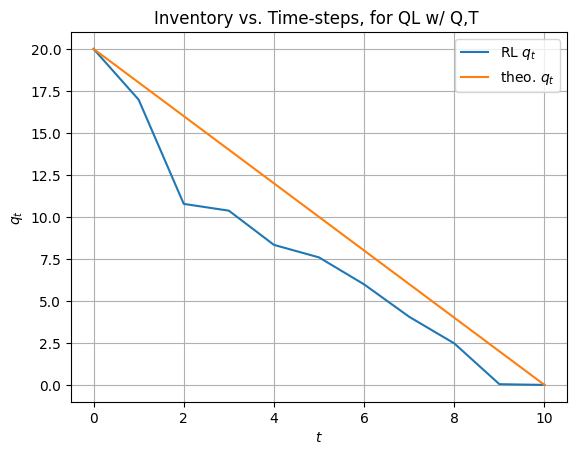

In [10]:
plt.plot(q0, label ='RL $q_t$')
plt.plot(q, label='theo. $q_t$')
plt.ylabel('$q_t$')
plt.xlabel('$t$')
plt.title('Inventory vs. Time-steps, for QL w/ Q,T ')
plt.grid(True)
plt.legend()
plt.show()

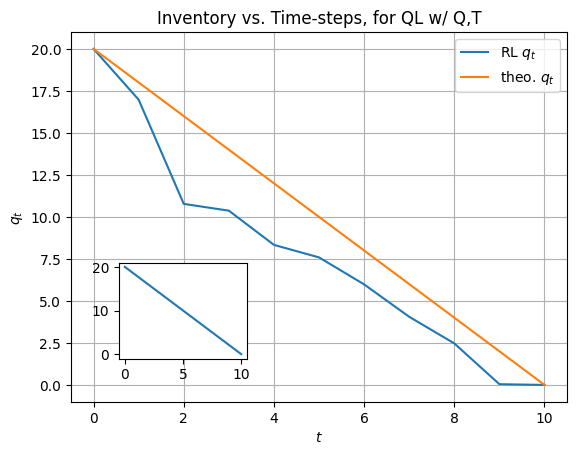

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
t = np.arange(0.0, 10.0, 0.1)

# Create the main plot
plt.plot(q0, label = 'RL $q_t$')
plt.plot(q,  label = 'theo. $q_t$')
plt.ylabel('$q_t$')
plt.xlabel('$t$')
plt.title('Inventory vs. Time-steps, for QL w/ Q,T')
plt.grid(True)
plt.legend()

# Create inset axes
left, bottom, width, height = [0.2, 0.2, 0.2, 0.2]  # Adjust position and size of inset
inset_ax = plt.axes([left, bottom, width, height])
inset_ax.plot(q)  # Example plot in the inset

plt.show()


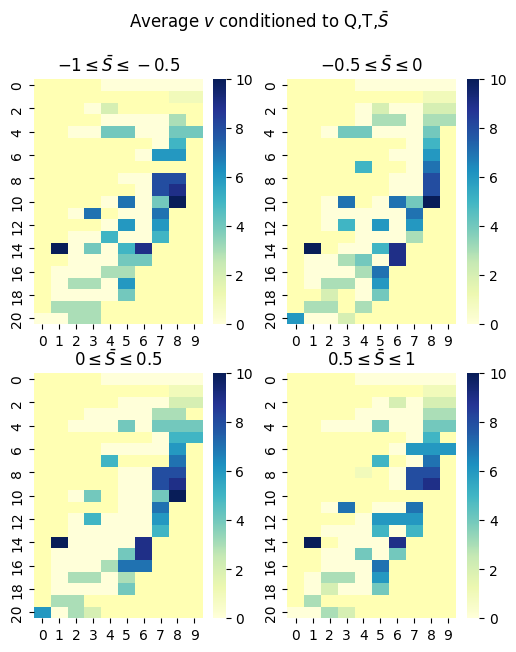

In [12]:
mu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qtp_10k/perAz/stati.npy')#np.load('C:/Users/macri/Desktop/ennesima/stati.npy')# 
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/a=0.002/qtp_10k/perAz/dati.npy') #np.load('C:/Users/macri/Desktop/ennesima/dati.npy')#np.load('C:/Users/macri/Desktop/SCRIPT FINALI/RISULTATI/0.002/0.002_QTP/perAz/dati.npy') #heatAct(mu0qtp,data.min(),data.max())
 
heatAct(mu0qtp,data.min(),data.max(), azioni_tw.reshape(-1,10).mean(0))

Time varying impacts - Increasing
===
Ottimizzare è la miglior stratega qui

Features Q,T

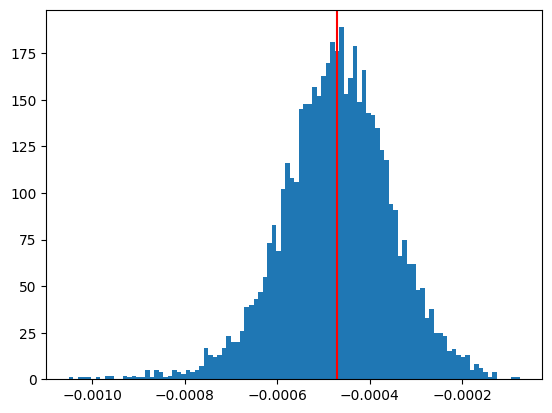

median= -0.000468414421222797 std= 0.00011857831829474743 Dmean= -0.0004715380510418798
forma chiusa= 0.26
twap= 0.14583247259877113
ql= 0.2401203890810053


In [13]:
from scipy.optimize import minimize
import numpy as np

def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian

def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(k[:-T] * v[T:] * v[:-T]) + np.sum(v * v * a)

def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
a = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(-20, 20) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = v_t 
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x
dati =  np.asarray(dat)

a_hist = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))
at = np.asarray(at)


azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qt_10k/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qt_10k/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))

a = np.asarray(a)

data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


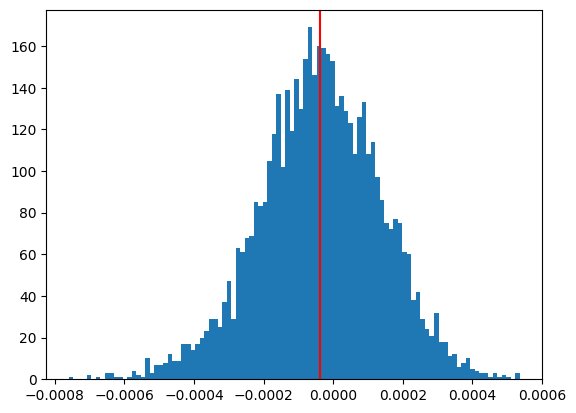

median= -3.552480739438824e-05 std= 0.00017496473316952905 Dmean= -3.7825887919388315e-05
theo.= 0.23255840414710233
ql= 0.2401203890810053


In [14]:
numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = np.ones(10) * 2 
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x
dati =  np.asarray(dat)

a_hist = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))
at = np.asarray(at)#[:1000]
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
#print('twap=', ((200-np.asarray(atw)).mean()))
print('theo.=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


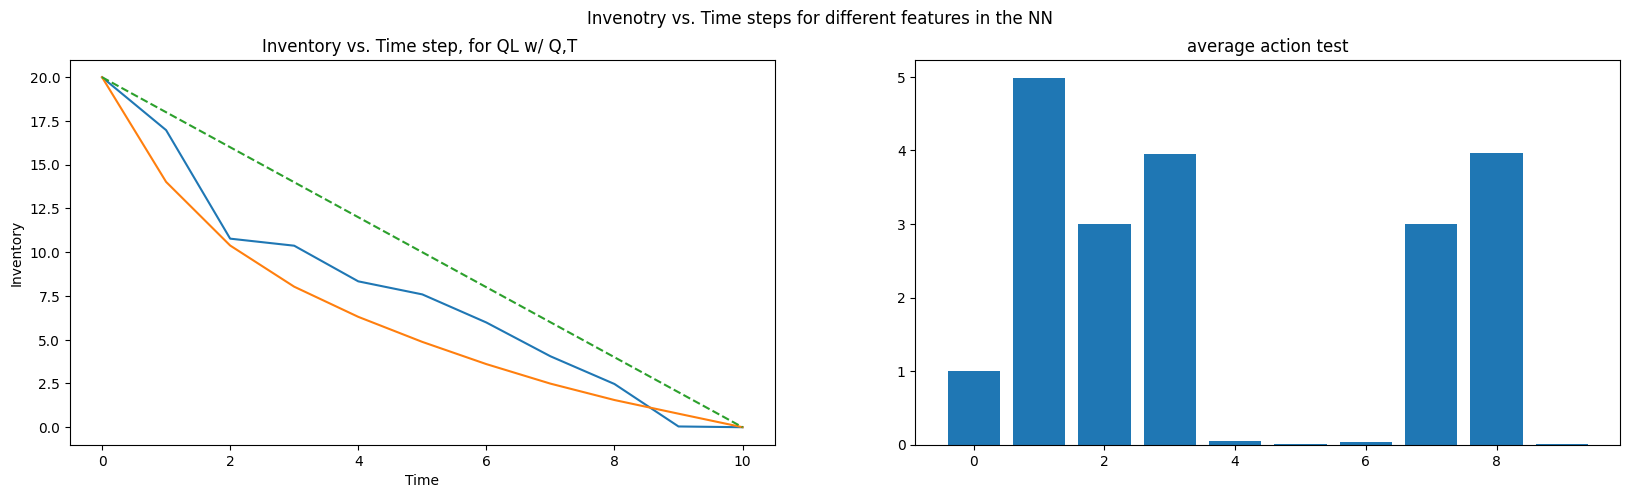

In [15]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qt_10k/azioni.npy').reshape(-1,10).mean(0)
q0qt = np.zeros(11) 
q0qt[0] = 20
for i in range(1,10):
    q0qt[i] =  q0qt[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

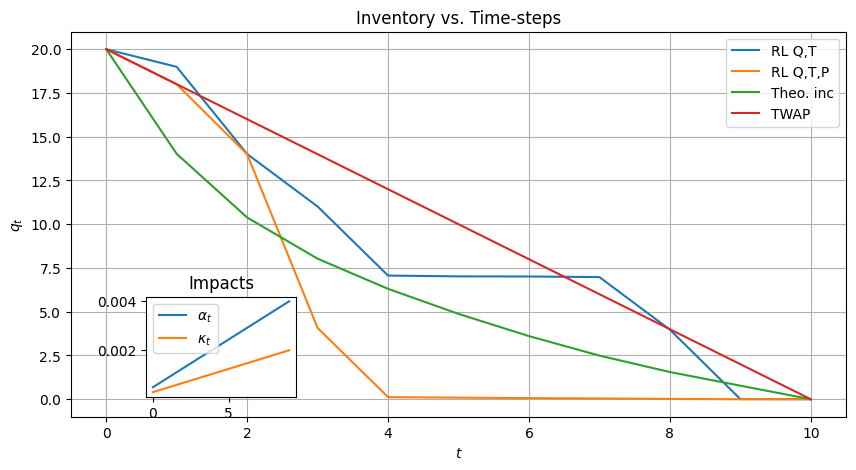

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
t = np.arange(0.0, 10.0, 0.1)
###
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qt_10k/azioni.npy').reshape(-1,10).mean(0)
qt_inc = np.zeros(11) 
qt_inc[0] = 20
for i in range(1,10):
    qt_inc[i] =  qt_inc[i - 1] - azionimu0[i - 1]
##
azionimu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qtp_10k/azioni.npy').reshape(-1,10).mean(0)
#azionimu0qtp = v_t
qtp_inc = np.zeros(11) 
qtp_inc[0] = 20
for i in range(1,10):
    qtp_inc[i] =  qtp_inc[i - 1] - azionimu0qtp[i - 1]
##
theo = v_t#azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - theo[i - 1]


twap = azioni_tw.reshape(-1,10).mean(0)
qTW = np.zeros(11) 
qTW[0] = 20
for i in range(1,10):
    qTW[i] =  qTW[i - 1] - twap[i - 1]

# Create the main plot
plt.figure(figsize=(10, 5))
plt.plot(qt_inc, label = 'RL Q,T')
plt.plot(qtp_inc,  label = 'RL Q,T,P')
plt.plot(qT,  label = 'Theo. inc')
plt.plot(qTW,  label = 'TWAP')
plt.ylabel('$q_t$')
plt.xlabel('$t$')
plt.title('Inventory vs. Time-steps')
#plt.figsize=(6, 7)
plt.grid(True)
plt.legend()

# Create inset axes
left, bottom, width, height = [0.2, 0.15, 0.15, 0.2]  # Adjust position and size of inset
inset_ax = plt.axes([left, bottom, width, height])
inset_ax.plot(a_hist, label = '$\\alpha_t$')  # Example plot in the inset
inset_ax.plot(k, label = '$\kappa_t$')  # Example plot in the inset
inset_ax.set_title('Impacts')
inset_ax.legend()

plt.show()

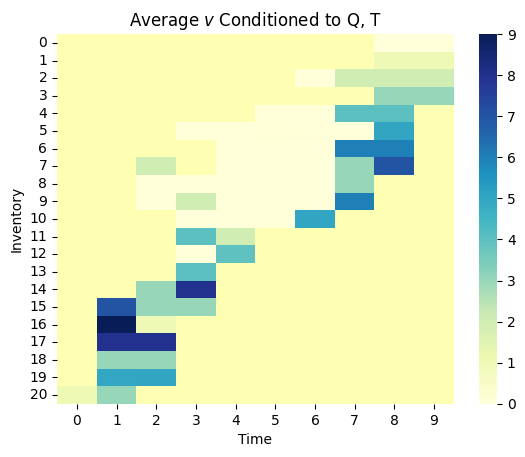

[20.         14.01897484 10.3837598   8.0301093   6.30763543  4.87592657
  3.60662216  2.49123788  1.55453839  0.77326099  0.        ]


In [17]:
mu0 =    np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qt_10k/stati.npy')
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qt_10k/dati.npy')
 
mu0[:,1] = mu0[:,1] - 1

heat_v(mu0,v_t)


Features Q,T,P

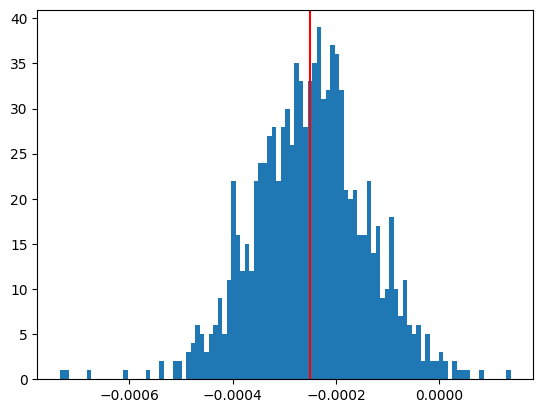

median= -0.0002471847744198842 std= 0.0001088047464831954 Dmean= -0.00024922514447169654
twap= 0.14454801045696367
theo.= 0.14454801045696367
ql= 0.19449387845038932


In [18]:
from scipy.optimize import minimize
import numpy as np

def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian

def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(k[:-T] * v[T:] * v[:-T]) + np.sum(v * v * a)

def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
a = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(-20, 20) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = v_t 
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x
dati =  np.asarray(dat)

a_hist = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))
at = np.asarray(at)[:1000]


azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qtp_10k/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qtp_10k/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))
#*100
a = np.asarray(a)

a_hist = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])
atw = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    atw.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_tw.reshape(-1,10).mean(0) - a_hist * azioni_tw.reshape(-1,10).mean(0)**2))
atw = np.asarray(at)[:1000]

data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('twap=', ((200-np.asarray(atw)).mean()))
print('theo.=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


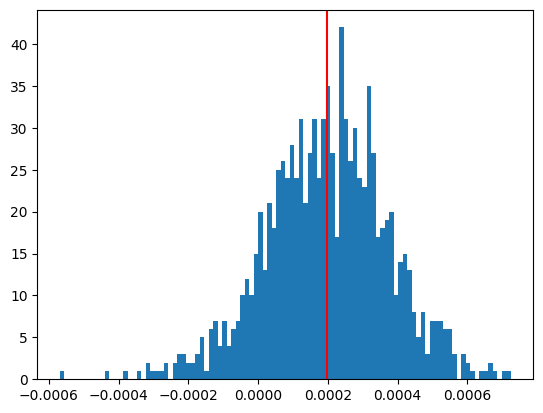

median= 0.00020068365260256729 std= 0.0001766563233610028 Dmean= 0.00019644890351653015
theo= 0.14454801045696367
twap.= 0.23373177474304915
ql= 0.19449387845038932


In [19]:
numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = np.ones(10) * 2 
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x
dati =  np.asarray(dat)

a_hist = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))
at = np.asarray(at)[:1000]
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('theo=', ((200-np.asarray(atw)).mean()))
print('twap.=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


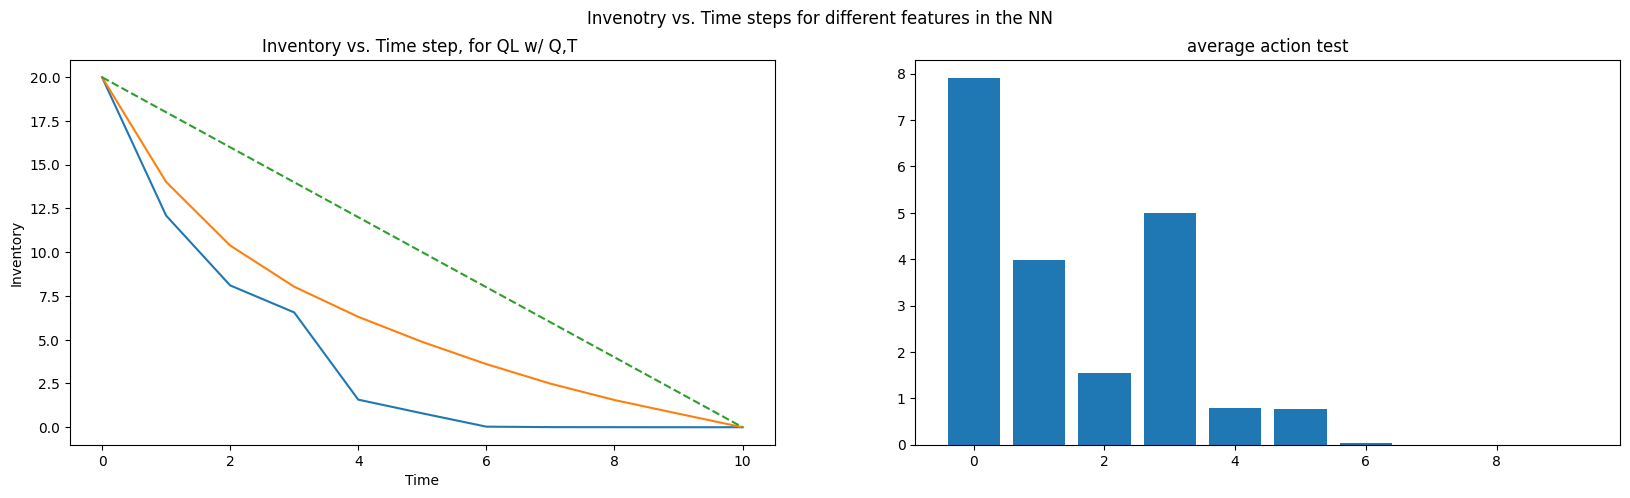

In [20]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qtp_10k/perAz/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]
    
twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

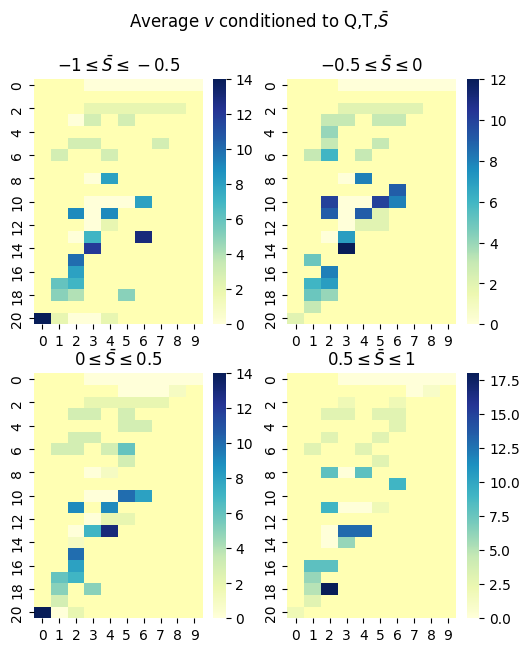

In [21]:
mu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qtp_10k/perAz/stati.npy')#[:5000]
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qtp_10k/perAz/dati.npy') #[:5000]

heatAct(mu0qtp,data.min(),data.max(),v_t)

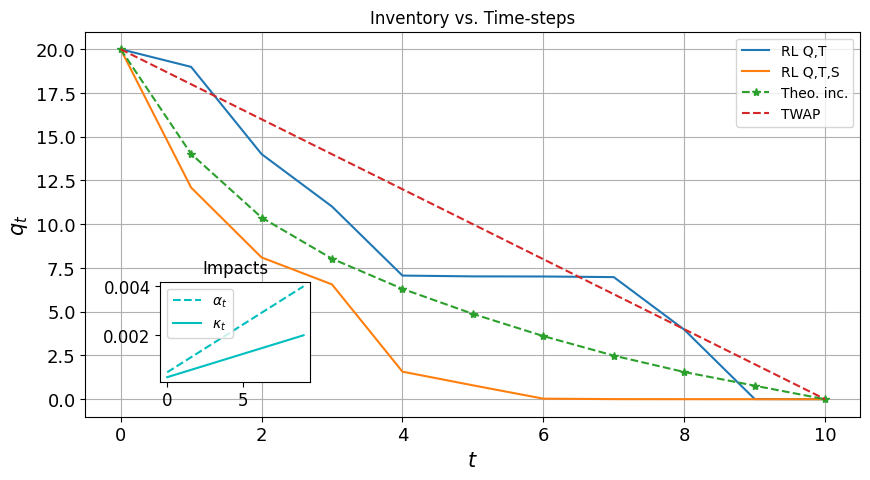

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
t = np.arange(0.0, 10.0, 0.1)
###
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qt_10k/azioni.npy').reshape(-1,10).mean(0)
qt_inc = np.zeros(11) 
qt_inc[0] = 20
for i in range(1,10):
    qt_inc[i] =  qt_inc[i - 1] - azionimu0[i - 1]
##
azionimu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/inc_time_var/qtp_10k/perAz/azioni.npy').reshape(-1,10).mean(0)
#azionimu0qtp = v_t
qtp_inc = np.zeros(11) 
qtp_inc[0] = 20
for i in range(1,10):
    qtp_inc[i] =  qtp_inc[i - 1] - azionimu0qtp[i - 1]
##
theo = v_t#azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - theo[i - 1]


twap = azioni_tw.reshape(-1,10).mean(0)
qTW = np.zeros(11) 
qTW[0] = 20
for i in range(1,10):
    qTW[i] =  qTW[i - 1] - twap[i - 1]

# Create the main plot
plt.figure(figsize=(10, 5))
plt.plot(qt_inc, label = 'RL Q,T')
plt.plot(qtp_inc,  label = 'RL Q,T,S')
plt.plot(qT, '*--', label = 'Theo. inc.' )
plt.plot(qTW, '--' , label = 'TWAP')
plt.ylabel('$q_t$', fontsize=15)  # Adjust fontsize here
plt.xlabel('$t$'  , fontsize=15)  # Adjust fontsize here
plt.title('Inventory vs. Time-steps')
plt.xticks(fontsize=13)  # Adjust fontsize here
plt.yticks(fontsize=13)  # Adjust fontsize here
plt.grid(True)
plt.legend()

# Create inset axes
left, bottom, width, height = [0.2, 0.18, 0.15, 0.2]  # Adjust position and size of inset
inset_ax = plt.axes([left, bottom, width, height])
inset_ax.plot(a_hist, '--',color = 'c', label = '$\\alpha_t$')  # Example plot in the inset
inset_ax.plot(k, '-', color = 'c',label = '$\kappa_t$')  # Example plot in the inset
inset_ax.tick_params(axis='both', labelsize=12) # Adjust fontsize here
inset_ax.tick_params(axis='both', labelsize=12) # Adjust fontsize here
inset_ax.set_title('Impacts')
inset_ax.legend()

plt.show()

Time varying impacts - Decreasing
===
Ottimizzare è la miglior stratega qui

Features Q,T

C:\Users\macri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:554: RuntimeWarning: Method SLSQP does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


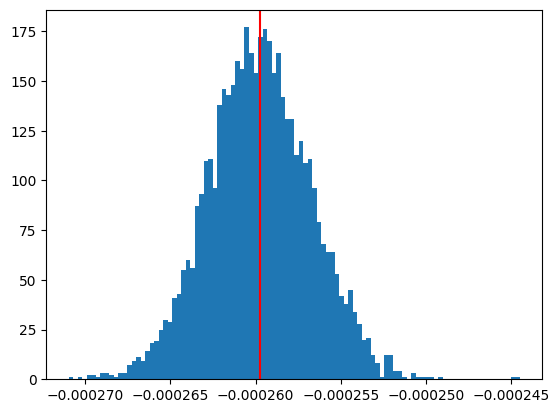

median= -0.0002597974077508981 std= 2.997211977326777e-06 Dmean= -0.0002597717343706324
forma chiusa= 0.26
twap= 0.2564199007225881
ql= 0.3080399304317449


In [23]:
from scipy.optimize import minimize
import numpy as np


def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian


def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(v[:-T] * k[T:] * k[:-T]) + np.sum(v * v * a)


def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
a = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(0, None) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), jac=objective_jacobian, hess=objective_hessian, constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.00001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI
    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    x = v_t#np.array([0.77331936, 0.78089145, 0.93636891, 1.115135  , 1.26913054,1.43160359, 1.72245318, 2.35376881, 3.63557102, 5.98175814])
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x
dati =  np.asarray(dat)#

a_hist = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))

azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qt_10k/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qt_10k/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))

a  = np.asarray(a)
at = np.asarray(at)
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


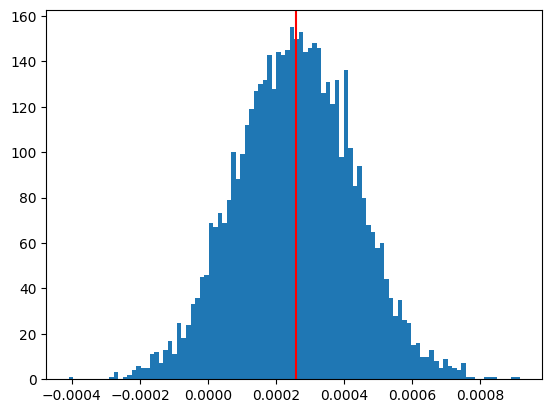

median= 0.0002578912278193284 std= 0.0001720220070554222 Dmean= 0.000257625154506304
theo= 0.14454801045696367
twap.= 0.35946665319830134
ql= 0.3080399304317449


In [24]:
numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = np.ones(10) * 2 
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x
dati =  np.asarray(dat)

a_hist = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))
at = np.asarray(at)#[:1000]
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('theo=', ((200-np.asarray(atw)).mean()))
print('twap.=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


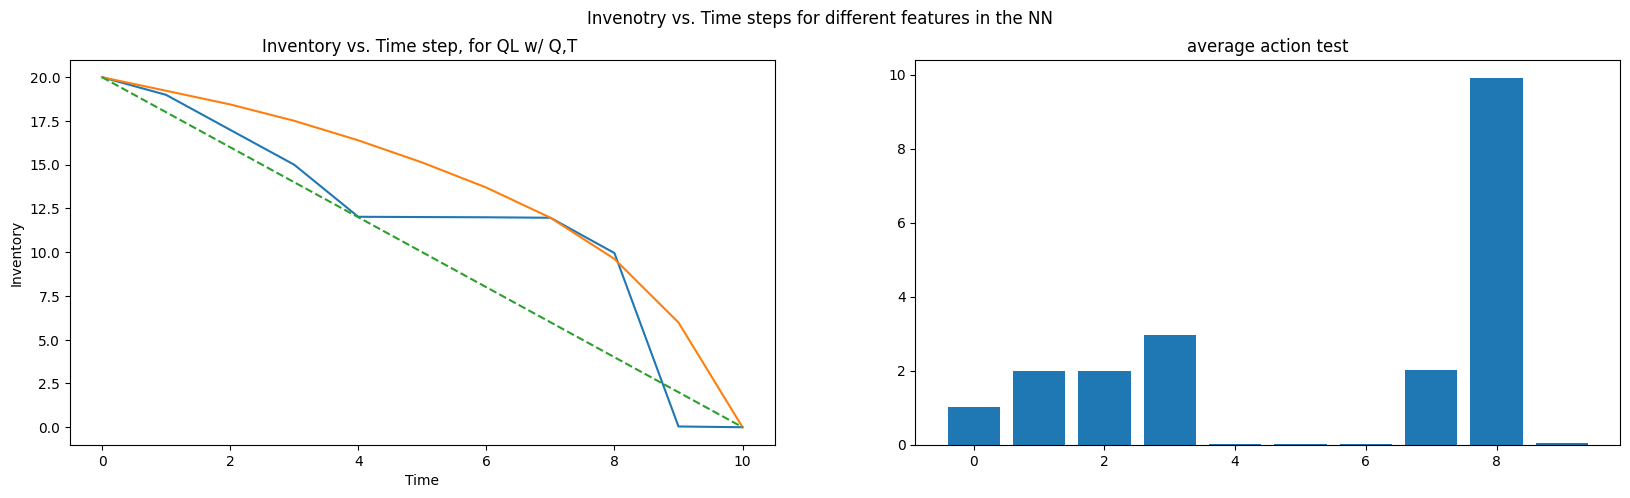

In [25]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qt_10k/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

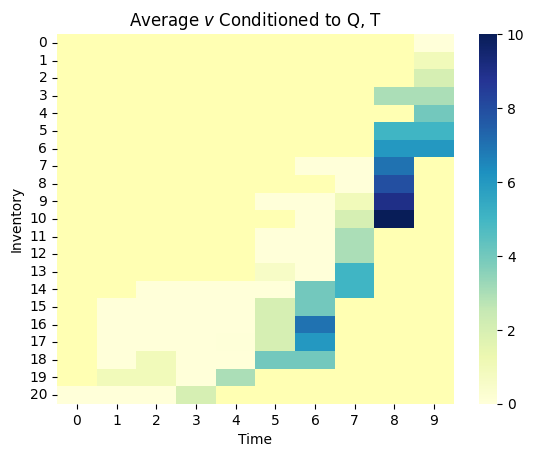

[20.         19.22668064 18.44578919 17.50942028 16.39428528 15.12515474
 13.69355115 11.97109797  9.61732916  5.98175814  0.        ]


In [26]:
mu0 =    np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qt_10k/old/stati.npy')
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qt_10k/old/dati.npy')
 
mu0[:,1] = mu0[:,1] - 1

heat_v(mu0,v_t)


Features Q,T,P

C:\Users\macri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:554: RuntimeWarning: Method SLSQP does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


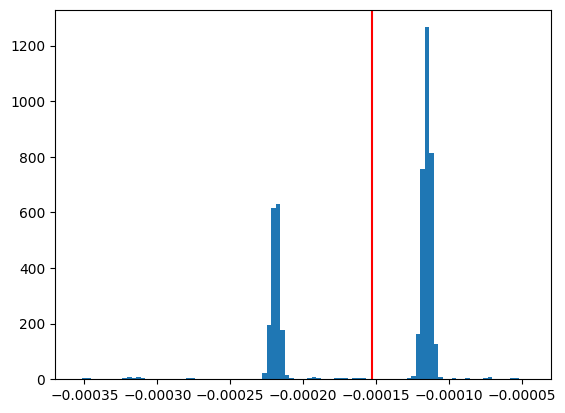

median= -0.00011727267661346603 std= 5.236215179673396e-05 Dmean= -0.00015244375546847282
forma chiusa= 0.26
twap= 0.2564236861972725
ql= 0.2877708519760229


In [27]:
from scipy.optimize import minimize
import numpy as np


def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian


def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(v[:-T] * k[T:] * k[:-T]) + np.sum(v * v * a)


def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
a = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(0, None) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), jac=objective_jacobian, hess=objective_hessian, constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.00001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI
    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    x = np.array([0.77331936, 0.78089145, 0.93636891, 1.115135  , 1.26913054,
       1.43160359, 1.72245318, 2.35376881, 3.63557102, 5.98175814])
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x
dati =  np.asarray(dat)#

a_hist = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))

azioni = np.load('C:/Users/macri/Desktop/RL/Optimal_agnostic_Impacts_Detection/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qtp_10k/nuovissima/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/RL/Optimal_agnostic_Impacts_Detection/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qtp_10k/nuovissima/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))

a = np.asarray(a)

data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


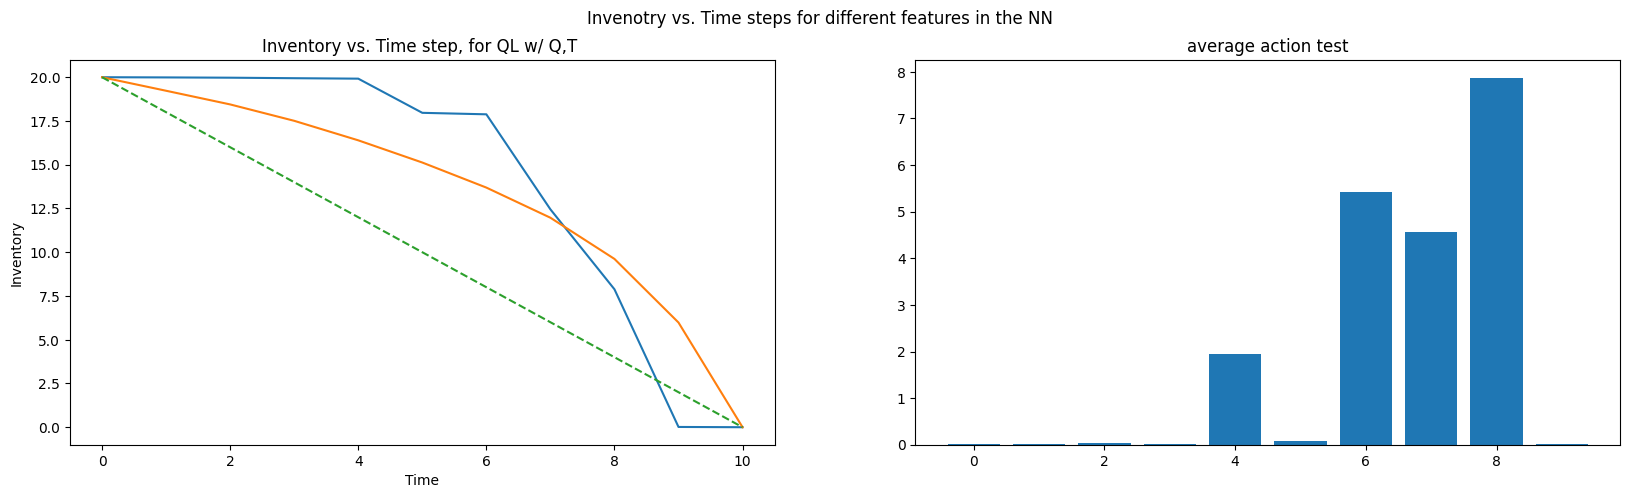

In [28]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qtp_10k/perAz/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

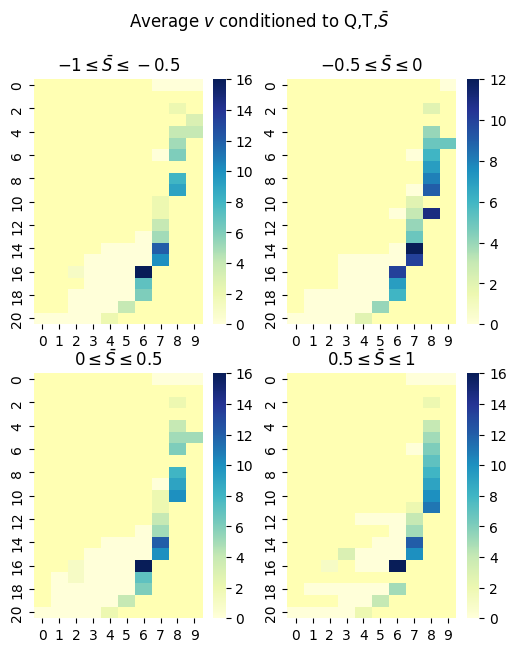

In [29]:
mu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qtp_10k/perAz/stati.npy')
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qtp_10k/perAz/dati.npy')

heatAct(mu0qtp,data.min(),data.max(),v_t)

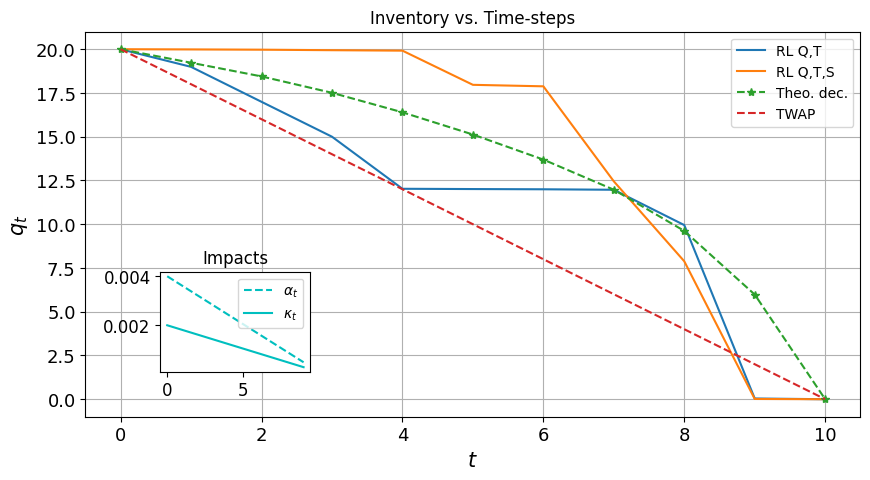

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
t = np.arange(0.0, 10.0, 0.1)
###
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qt_10k/azioni.npy').reshape(-1,10).mean(0)
qt_inc = np.zeros(11) 
qt_inc[0] = 20
for i in range(1,10):
    qt_inc[i] =  qt_inc[i - 1] - azionimu0[i - 1]
##
azionimu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/dec_time_avr/qtp_10k/perAz/azioni.npy').reshape(-1,10).mean(0)
#azionimu0qtp = v_t
qtp_inc = np.zeros(11) 
qtp_inc[0] = 20
for i in range(1,10):
    qtp_inc[i] =  qtp_inc[i - 1] - azionimu0qtp[i - 1]
##
theo = v_t#azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - theo[i - 1]


twap = azioni_tw.reshape(-1,10).mean(0)
qTW = np.zeros(11) 
qTW[0] = 20
for i in range(1,10):
    qTW[i] =  qTW[i - 1] - twap[i - 1]

# Create the main plot
plt.figure(figsize=(10, 5))
plt.plot(qt_inc, label = 'RL Q,T')
plt.plot(qtp_inc,  label = 'RL Q,T,S')
plt.plot(qT, '*--', label = 'Theo. dec.' )
plt.plot(qTW, '--' , label = 'TWAP')
plt.ylabel('$q_t$', fontsize=15)  # Adjust fontsize here
plt.xlabel('$t$'  , fontsize=15)  # Adjust fontsize here
plt.title('Inventory vs. Time-steps')
plt.xticks(fontsize=13)  # Adjust fontsize here
plt.yticks(fontsize=13)  # Adjust fontsize here
plt.grid(True)
plt.legend()

# Create inset axes
left, bottom, width, height = [0.2, 0.2, 0.15, 0.2]  # Adjust position and size of inset
inset_ax = plt.axes([left, bottom, width, height])
inset_ax.plot(a_hist, '--',color = 'c', label = '$\\alpha_t$')  # Example plot in the inset
inset_ax.plot(k, '-', color = 'c',label = '$\kappa_t$')  # Example plot in the inset
inset_ax.set_title('Impacts')
inset_ax.legend()
inset_ax.tick_params(axis='both', labelsize=12) # Adjust fontsize here
inset_ax.tick_params(axis='both', labelsize=12) # Adjust fontsize here
plt.show()

Mixed Impacts
===


Increasing QT

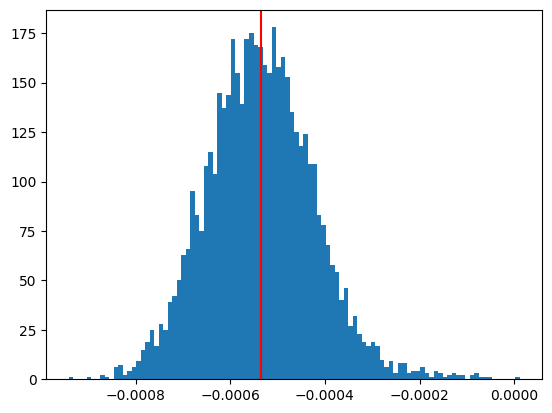

median= -0.0005383582704271321 std= 0.00011338231974757315 Dmean= -0.000535210286540194
forma chiusa= 0.26
twap= 0.14544891618707717
ql= 0.2554289089926633


In [31]:
from scipy.optimize import minimize
import numpy as np

def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian

def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(k[:-T] * v[T:] * v[:-T]) + np.sum(v * v * a)

def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
a = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(-20, 20) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 5000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = v_t 
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x#np.ones(10) * 2#x
dati =  np.asarray(dat)

a_hist = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))
at = np.asarray(at)


azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/inc/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/inc/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))

a = np.asarray(a)[:5000]

data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


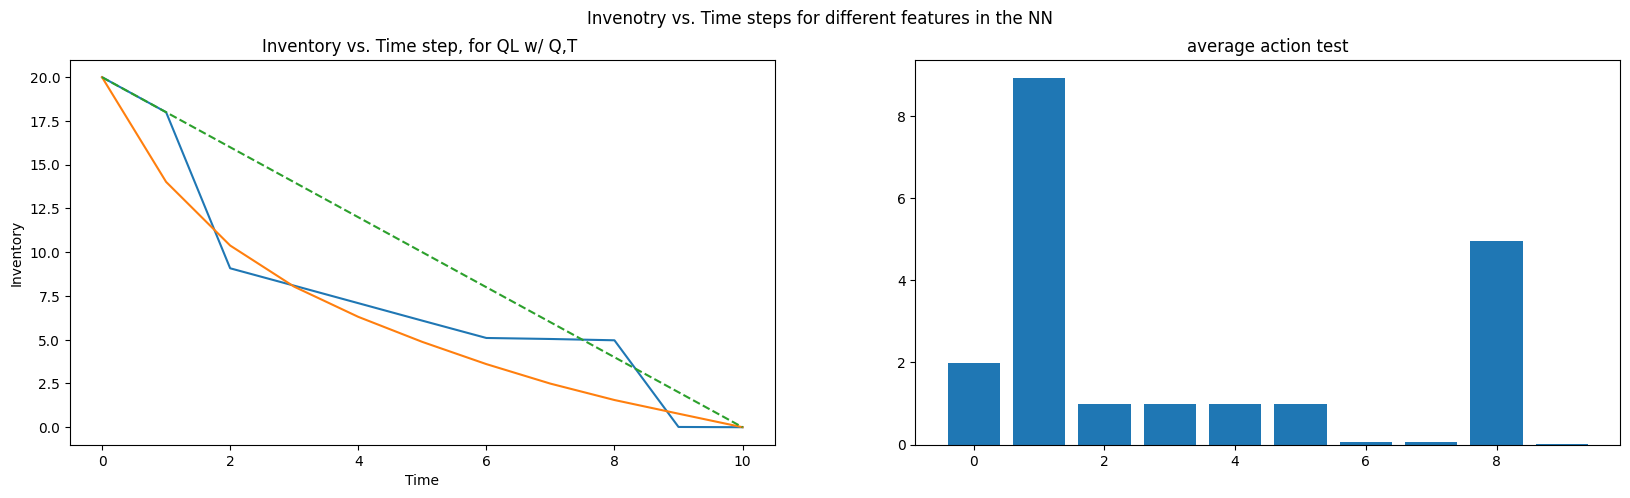

In [32]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/inc/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

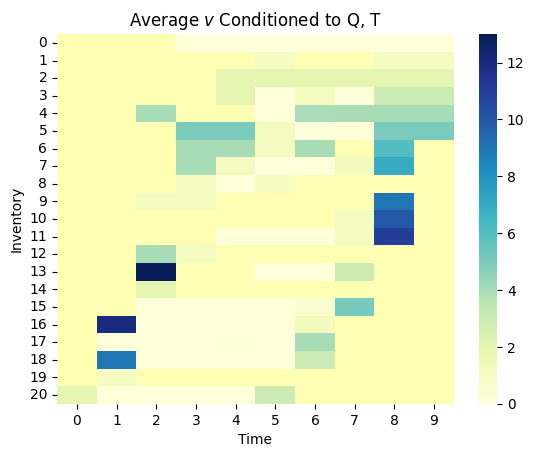

[20.         14.01897484 10.3837598   8.0301093   6.30763543  4.87592657
  3.60662216  2.49123788  1.55453839  0.77326099  0.        ]


In [33]:
mu0  =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/inc/stati.npy')
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/inc/dati.npy')
 
mu0[:,1] = mu0[:,1] - 1

heat_v(mu0,v_t)

Increasing QTP

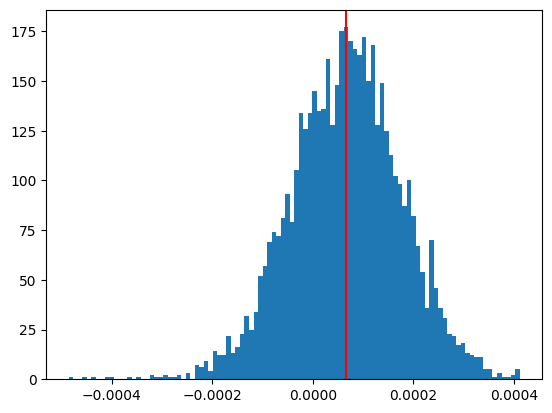

median= 6.895345193188467e-05 std= 0.00010947785673949073 Dmean= 6.648744065474376e-05
forma chiusa= 0.26
twap= 0.14500627222307813
ql= 0.13190130559032892


In [34]:
from scipy.optimize import minimize
import numpy as np

def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian

def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(k[:-T] * v[T:] * v[:-T]) + np.sum(v * v * a)

def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
a = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(-20, 20) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 5_000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = v_t 
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x#np.ones(10) * 2#x
dati =  np.asarray(dat)

a_hist = np.array([0.00049, 0.00088, 0.00127, 0.00166, 0.00205, 0.00244, 0.00283,  0.00322, 0.00361, 0.004  ])
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))
at = np.asarray(at)


azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/inc/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/inc/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))
#*100
a = np.asarray(a)

data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


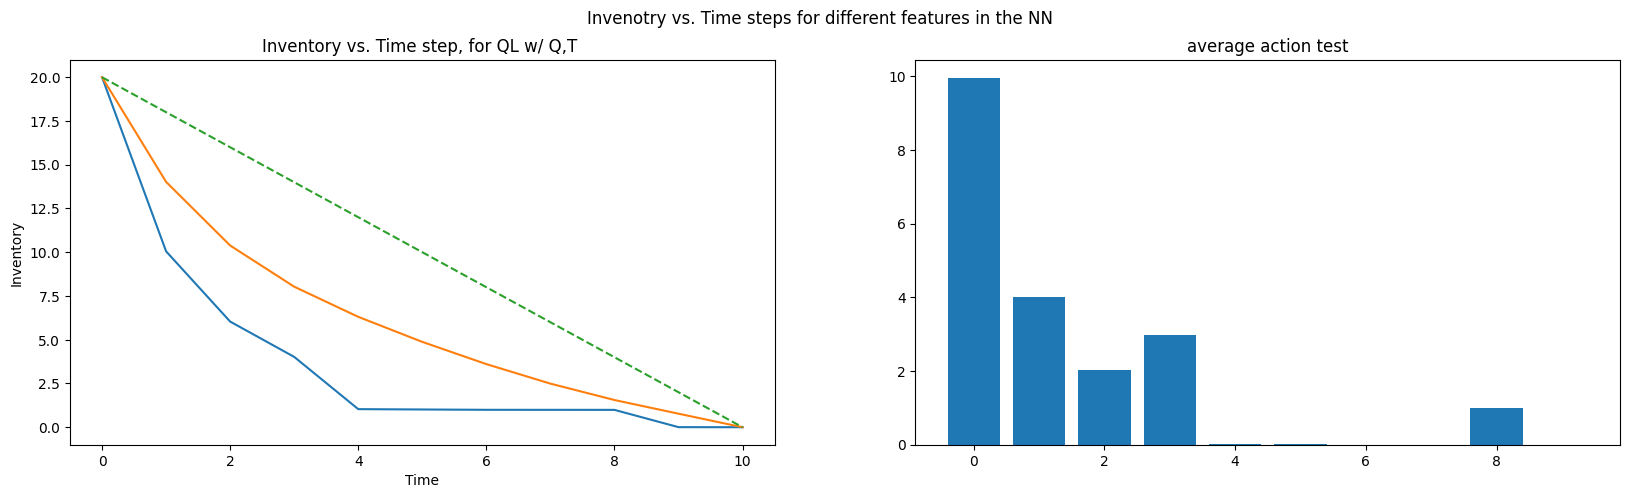

In [35]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/inc/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

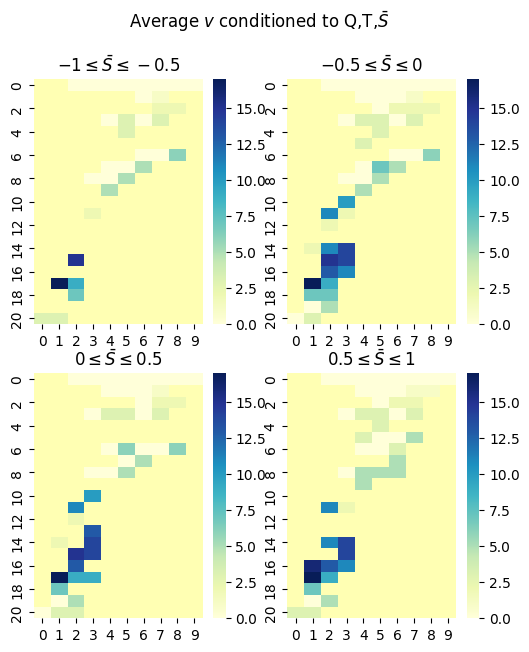

In [36]:
mu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/inc/perAz/stati.npy')
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/inc/perAz/dati.npy')

heatAct(mu0qtp,data.min(),data.max(),v_t)

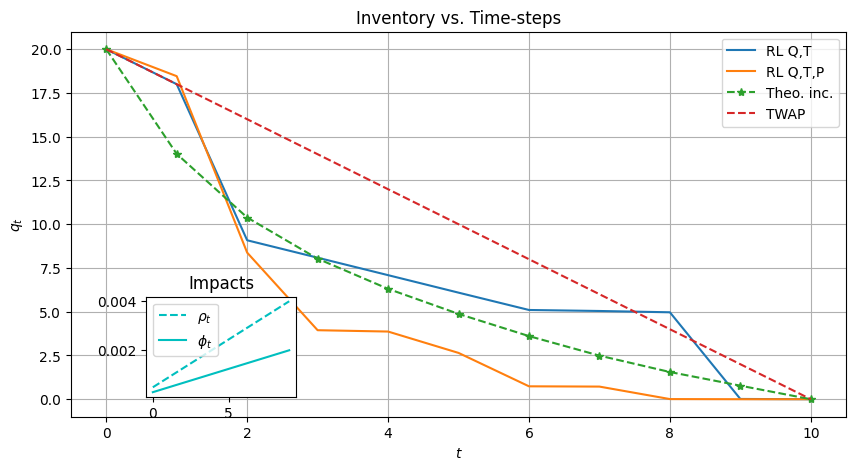

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
t = np.arange(0.0, 10.0, 0.1)
###
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/inc/azioni.npy').reshape(-1,10).mean(0)
qt_inc = np.zeros(11) 
qt_inc[0] = 20
for i in range(1,10):
    qt_inc[i] =  qt_inc[i - 1] - azionimu0[i - 1]
##
azionimu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/inc/perAz/azioni.npy').reshape(-1,10).mean(0)
#azionimu0qtp = v_t
qtp_inc = np.zeros(11) 
qtp_inc[0] = 20
for i in range(1,10):
    qtp_inc[i] =  qtp_inc[i - 1] - azionimu0qtp[i - 1]
##
theo = v_t#azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - theo[i - 1]


twap = azioni_tw.reshape(-1,10).mean(0)
qTW = np.zeros(11) 
qTW[0] = 20
for i in range(1,10):
    qTW[i] =  qTW[i - 1] - twap[i - 1]

# Create the main plot
plt.figure(figsize=(10, 5))
plt.plot(qt_inc, label = 'RL Q,T')
plt.plot(qtp_inc,  label = 'RL Q,T,P')
plt.plot(qT, '*--', label = 'Theo. inc.' )
plt.plot(qTW, '--' , label = 'TWAP')
plt.ylabel('$q_t$')
plt.xlabel('$t$')
plt.title('Inventory vs. Time-steps')
#plt.figsize=(6, 7)
plt.grid(True)
plt.legend()

# Create inset axes
left, bottom, width, height = [0.2, 0.15, 0.15, 0.2]  # Adjust position and size of inset
inset_ax = plt.axes([left, bottom, width, height])
inset_ax.plot(a_hist, '--',color = 'c', label = '$\\rho_t$')  # Example plot in the inset
inset_ax.plot(k, '-', color = 'c',label = '$\phi_t$')  # Example plot in the inset
inset_ax.set_title('Impacts')
inset_ax.legend()

plt.show()

Decreasing QT


C:\Users\macri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:554: RuntimeWarning: Method SLSQP does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


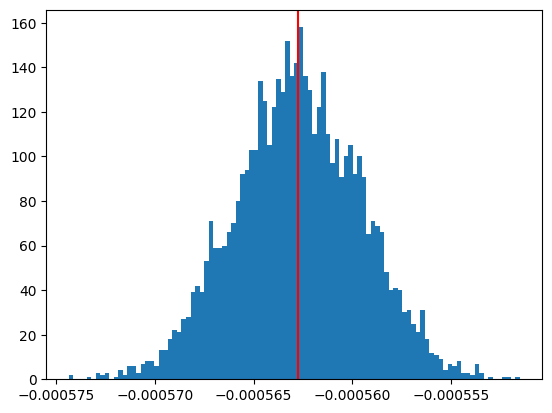

median= -0.0005627534935524542 std= 3.1957908836022045e-06 Dmean= -0.00056273874846639
forma chiusa= 0.26
twap= 0.2564386809802275
ql= 0.36962846620113915


In [38]:
from scipy.optimize import minimize
import numpy as np


def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian


def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(v[:-T] * k[T:] * k[:-T]) + np.sum(v * v * a)


def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
a = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(0, None) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), jac=objective_jacobian, hess=objective_hessian, constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 10_000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.00001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI
    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    x = np.array([0.77331936, 0.78089145, 0.93636891, 1.115135  , 1.26913054, 1.43160359, 1.72245318, 2.35376881, 3.63557102, 5.98175814])#v_t#np.array([0.77331936, 0.78089145, 0.93636891, 1.115135  , 1.26913054,1.43160359, 1.72245318, 2.35376881, 3.63557102, 5.98175814])
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]
        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x#np.ones(10) * 2#x
dati =  np.asarray(dat)#

a_hist = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))

azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/dec/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/dec/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))

a  = np.asarray(a)
at = np.asarray(at)[:5000]
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


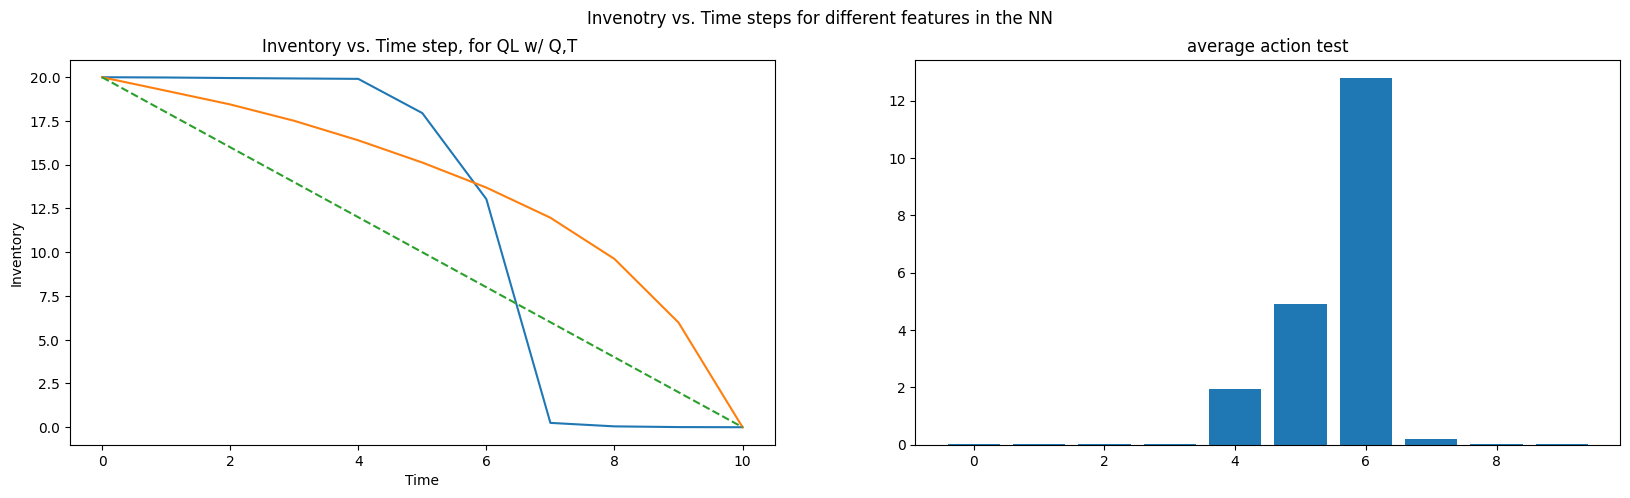

In [39]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/dec/azioni.npy').reshape(-1,10).mean(0) 
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

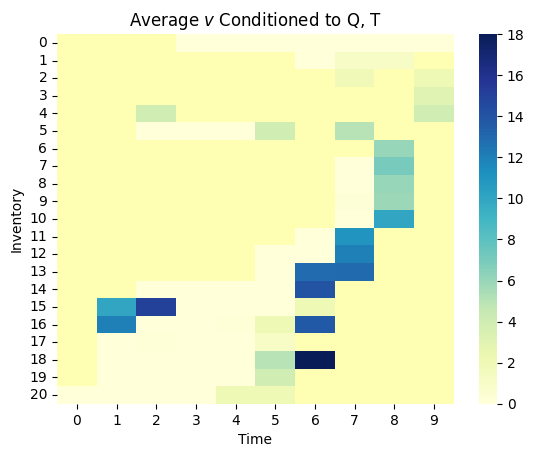

[20.         19.22668064 18.44578919 17.50942028 16.39428528 15.12515474
 13.69355115 11.97109797  9.61732916  5.98175814  0.        ]


In [40]:
mu0  =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/dec/stati.npy')
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/dec/dati.npy')
 
mu0[:,1] = mu0[:,1] - 1

heat_v(mu0, v_t)

Decreasing QTP


C:\Users\macri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:554: RuntimeWarning: Method SLSQP does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


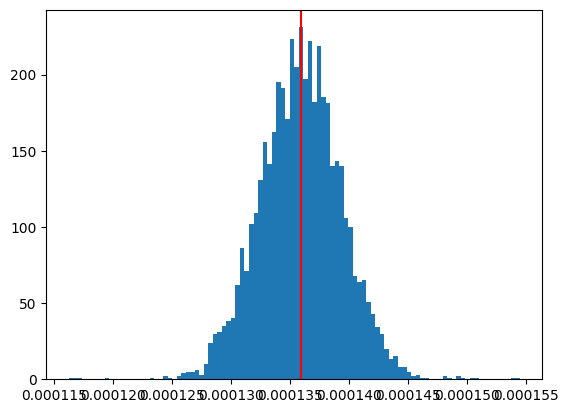

median= 0.00013592977833349042 std= 3.4613160124641477e-06 Dmean= 0.0001359164923307072
forma chiusa= 0.26
twap= 0.25642048869643685
ql= 0.2356422180223435


In [41]:
from scipy.optimize import minimize
import numpy as np


def objective_jacobian(v, k, a):
    T = len(k)
    jacobian = np.zeros(T)
    for i in range(T):
        jacobian[i] = k[i] * k[i-1] + 2 * v[i] * a[i]
    return jacobian


def objective_hessian(v, k, a):
    T = len(k)
    hessian = np.zeros((T, T))
    for i in range(T):
        hessian[i, i] = 2 * a[i]
    return hessian


def objective(v, k, a):
    T = 10
    return np.sum(v[:-T] * k[T:] * k[:-T]) + np.sum(v * v * a)


def constraint(v):
    return np.sum(v) - 20

T = 10

k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
a = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  

initial_guess = np.ones(T)


con = {'type': 'eq', 'fun': constraint}
bounds = [(0, None) for _ in range(T)]


result = minimize(objective, initial_guess, args=(k, a), jac=objective_jacobian, hess=objective_hessian, constraints=con, bounds=bounds)


optimal_v = result.x
minimum_value = result.fun

v_t = np.asarray(optimal_v)

numIt = 10_000
PASSI = 10
INV = 20
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.00001
a_hist = []
k_hist = []
for j in range(numIt):
    slices = PASSI
    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    x = np.array([0.77331936, 0.78089145, 0.93636891, 1.115135  , 1.26913054, 1.43160359, 1.72245318, 2.35376881, 3.63557102, 5.98175814])#v_t#np.array([0.77331936, 0.78089145, 0.93636891, 1.115135  , 1.26913054,1.43160359, 1.72245318, 2.35376881, 3.63557102, 5.98175814])
    
    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = np.array([0.002  , 0.00181, 0.00162, 0.00143, 0.00124, 0.00105, 0.00086,  0.00067, 0.00048, 0.00029])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []

        tempo += 1
        s_0 = dati[-1]
        inv = inv-x[i]
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x#np.ones(10) * 2#x
dati =  np.asarray(dat)#

a_hist = np.array([0.004  , 0.00361, 0.00322, 0.00283, 0.00244, 0.00205, 0.00166,0.00127, 0.00088, 0.00049])  
at = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    at.append(sum(dati[:,0].reshape(-1,10)[i]* azioni_st - a_hist * azioni_st**2))

azioni = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/azioni.npy')
dati =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/dati.npy')

a = []
for i in range(dati[:,0].reshape(-1,10).shape[0]):
    a.append(sum(dati[:,0].reshape(-1,10)[i]* azioni.reshape(-1,10)[i].T - a_hist * azioni.reshape(-1,10)[i].T**2))

a  = np.asarray(a)#-0.01
at = np.asarray(at)[:5000]
data = (a-at)/at
res = remove_outliers(data)
plt.hist(res, bins = 100)
plt.axvline(res.mean(), color = 'r')
plt.show()
from statistics import median
print('median=',median(res), 'std=',res.std(), 'Dmean=' ,res.mean())
print('forma chiusa=', c)
print('twap=', ((200-np.asarray(at)).mean()))
print('ql=', (200-np.asarray(a)).mean())


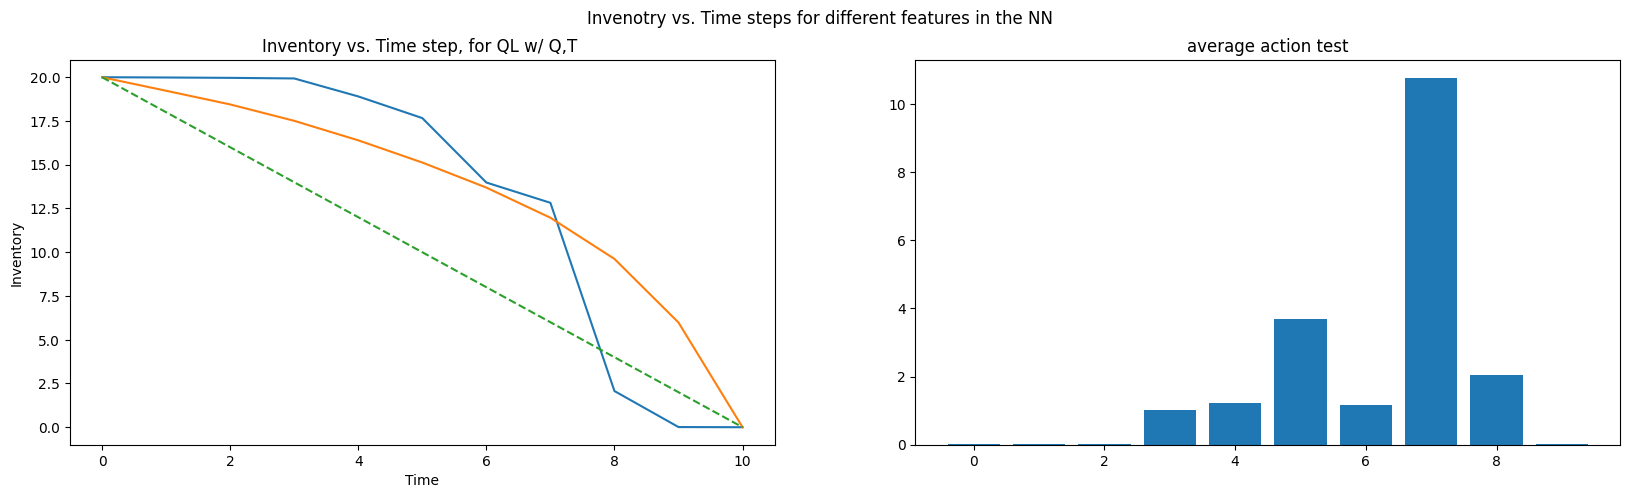

In [42]:
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/azioni.npy').reshape(-1,10).mean(0) #ennesima/azioni.npy').reshape(-1,10).mean(0) #
q0 = np.zeros(11) 
q0[0] = 20
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = v_t
q = np.zeros(11) 
q[0] = 20
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

twap = azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - twap[i - 1]


azioni_med = azionimu0
ranger = np.arange(0,azioni_med.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(qT, '--')
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T ')

axs[1].bar(ranger, azioni_med)

axs[1].set_title('average action test')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

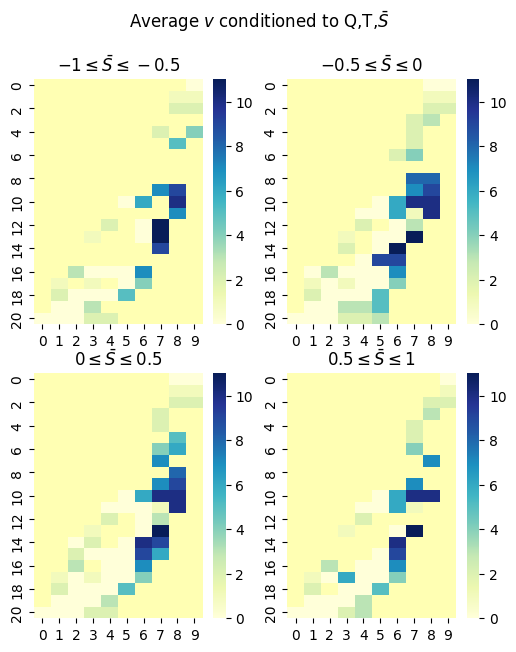

In [43]:
mu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/stati.npy')#
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/dati.npy' )#

heatAct(mu0qtp,data.min(),data.max(),v_t)

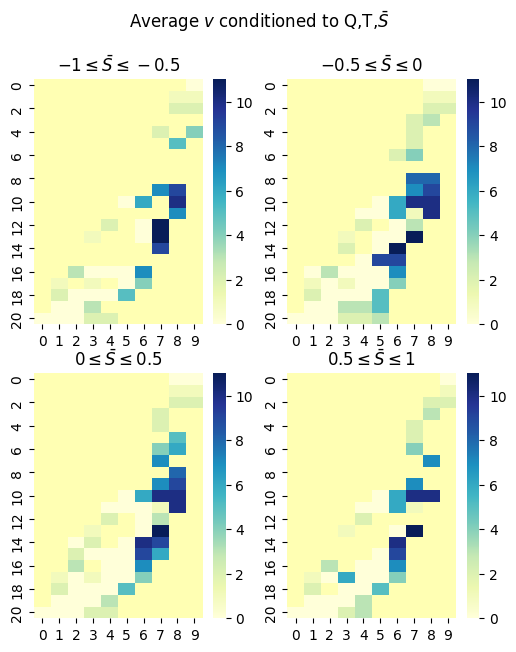

In [44]:
mu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/stati.npy')#CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/
data =   np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/dati.npy' )#CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/

heatAct(mu0qtp,data.min(),data.max(),v_t)

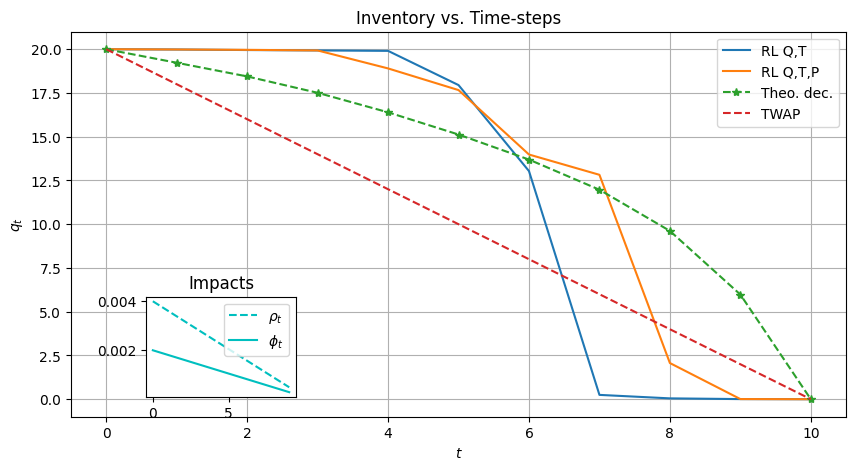

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
t = np.arange(0.0, 10.0, 0.1)
###
azionimu0 = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qt_20k/dec/azioni.npy').reshape(-1,10).mean(0)
qt_inc = np.zeros(11) 
qt_inc[0] = 20
for i in range(1,10):
    qt_inc[i] =  qt_inc[i - 1] - azionimu0[i - 1]
##
azionimu0qtp = np.load('C:/Users/macri/Desktop/CODICI FINALI/costrained/RISULTATI_ex_desktop_importa_in_Analisi/mix_imp/qtp_30k/dec/perAz/azioni.npy').reshape(-1,10).mean(0)
#azionimu0qtp = v_t
qtp_inc = np.zeros(11) 
qtp_inc[0] = 20
for i in range(1,10):
    qtp_inc[i] =  qtp_inc[i - 1] - azionimu0qtp[i - 1]
##
theo = v_t#azioni_tw.reshape(-1,10).mean(0)
qT = np.zeros(11) 
qT[0] = 20
for i in range(1,10):
    qT[i] =  qT[i - 1] - theo[i - 1]


twap = azioni_tw.reshape(-1,10).mean(0)
qTW = np.zeros(11) 
qTW[0] = 20
for i in range(1,10):
    qTW[i] =  qTW[i - 1] - twap[i - 1]

# Create the main plot
plt.figure(figsize=(10, 5))
plt.plot(qt_inc, label = 'RL Q,T')
plt.plot(qtp_inc,  label = 'RL Q,T,P')
plt.plot(qT, '*--', label = 'Theo. dec.' )
plt.plot(qTW, '--' , label = 'TWAP')
plt.ylabel('$q_t$')
plt.xlabel('$t$')
plt.title('Inventory vs. Time-steps')
#plt.figsize=(6, 7)
plt.grid(True)
plt.legend()

# Create inset axes
left, bottom, width, height = [0.2, 0.15, 0.15, 0.2]  # Adjust position and size of inset
inset_ax = plt.axes([left, bottom, width, height])
inset_ax.plot(a_hist, '--',color = 'c', label = '$\\rho_t$')  # Example plot in the inset
inset_ax.plot(k, '-', color = 'c',label = '$\phi_t$')  # Example plot in the inset
inset_ax.set_title('Impacts')
inset_ax.legend()

plt.show()